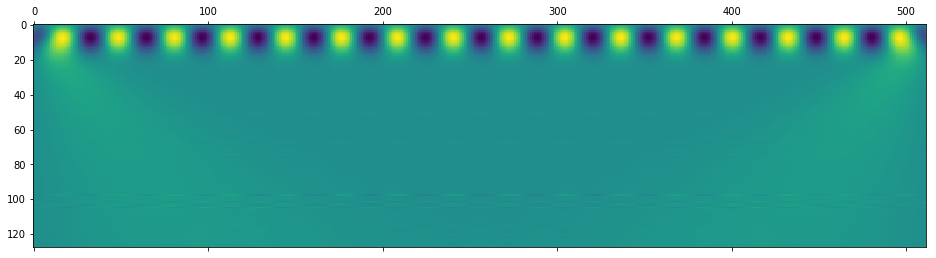

(128, 512)
(128,)


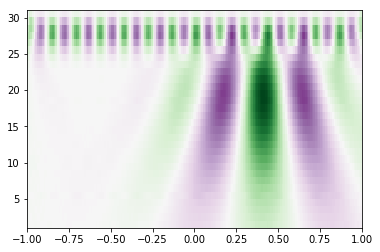

In [11]:
%matplotlib inline
import pywt
import numpy as np
import matplotlib.pyplot as plt

"""一维连续小波变换"""

x = np.arange(512)
y = np.sin(2*np.pi*x/32)
coef, freqs=pywt.cwt(y,np.arange(1,129),'gaus1')#y：输入信号 'gaus1'：小波名称
plt.matshow(coef) 
plt.show() 
print(coef.shape)
print(freqs.shape)
#----------
import pywt
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-0.4)**2)*np.exp(1j*2*np.pi*2*(t-0.4)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())  
plt.show() 

scales: (255,)
cwtmatr: (255, 1024)


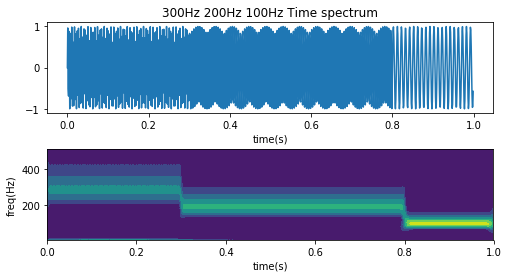

exit


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pywt
from matplotlib.font_manager import FontProperties

"""一维连续小波变换"""

sampling_rate = 1024
t = np.arange(0, 1.0, 1.0 / sampling_rate)
f1 = 100
f2 = 200
f3 = 300
data = np.piecewise(t, [t < 1, t < 0.8, t < 0.3],
                    [lambda t: np.sin(2 * np.pi * f1 * t), lambda t: np.sin(2 * np.pi * f2 * t),
                     lambda t: np.sin(2 * np.pi * f3 * t)])
wavename = 'cgau8'
totalscal = 256
fc = pywt.central_frequency(wavename)
cparam = 2 * fc * totalscal
scales = cparam / np.arange(totalscal, 1, -1)
print('scales:',scales.shape)
[cwtmatr, frequencies] = pywt.cwt(data, scales, wavename, 1.0 / sampling_rate)
plt.figure(figsize=(8, 4))

plt.subplot(211)
plt.plot(t, data)
plt.xlabel(u"time(s)")
plt.title(u"300Hz 200Hz 100Hz Time spectrum")

plt.subplot(212)
print('cwtmatr:',cwtmatr.shape)
plt.contourf(t, frequencies, abs(cwtmatr))
plt.ylabel(u"freq(Hz)")
plt.xlabel(u"time(s)")
plt.subplots_adjust(hspace=0.4)
plt.show()
print("exit")